In [1]:
import numpy as np

# Step 0

In [2]:
sample_size = 1000

# Starting coefficients
b = -1.5
w_1 = 2.0

In [9]:
# Randomly drawn value from a standard normal distribution
np.random.normal()

-0.6514256678833602

In [10]:
# Array of randomly drawn values from a standard normal distribution
np.random.normal(size=10)

array([-1.10491935,  0.26207767, -0.4247066 ,  0.27686622,  0.24873583,
        1.7799795 ,  0.7579471 , -0.87024765, -0.65098178, -0.42576741])

In [13]:
# Create x values
x = np.random.normal(size=sample_size)

In [14]:
# Create y values
y = b + w_1 * x + np.random.normal(size=sample_size)

In [15]:
len(x), len(y)

(1000, 1000)

In [16]:
# Plot x and y
import matplotlib.pyplot as plt

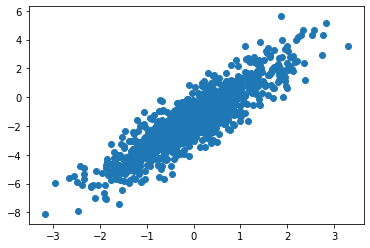

In [17]:
plt.scatter(x, y)

# Step 1

In [18]:
def make_line(x, slope, intercept):
    '''
    Calculate the prediction of y for given x values
    
    Params:
    -------
    
    x: The x values
    slope: The slope of the fitted line
    intercept: The intercept of the fitted line
    '''
    ypred = intercept + slope * x
    return ypred

In [21]:
ypred = make_line(x, w_1, b)

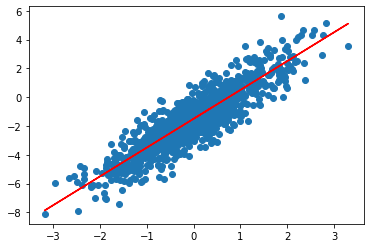

In [22]:
# We plot the actual data and the line together, let's see what we get
plt.scatter(x, y)
plt.plot(x, ypred, color='r')

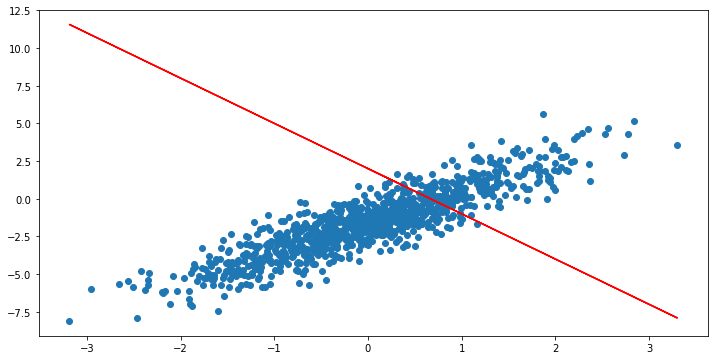

In [26]:
# Our machine learning algorithm does not know the true relationship!
# It has to start with some random guess
plt.scatter(x, y)
plt.plot(x, make_line(x, -3.0, 2.0), color='r')

In [25]:
# Increase the size of the plots
plt.rcParams['figure.figsize'] = (12,6)

# Step 2

In [27]:
# Create a function that calculates the mean-squared error
def mse(ytrue, ypred):
    '''
    Calculates mean_squared_error for y-values and predictions
    
    Params:
    -------
    
    ytrue: The true values of y
    ypred: The predicted values of y
    '''
    error = np.mean((ytrue-ypred)**2)
    return error

In [28]:
# Test the function
mse(y, make_line(x, -3.0, 2.0))

37.38802306018866

In [29]:
# Validate the outcome
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(y, make_line(x, -3.0, 2.0))

37.38802306018866

In [31]:
# Testing the function
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

In [32]:
# assert statement
# If a comparison is True, an assert statement passes silently
assert 1 == 1

In [34]:
# If a comparison is False, an assert statement will return an error
assert 1 == 2, "The two compared values are not equal"

AssertionError: The two compared values are not equal

# Step 3

In [38]:
# Defining the function that approximates the gradient
def calc_gradient(x, ytrue, slope, intercept):

    # Infinitessimal small change applied to each parameter
    dw = 0.0001
    
    ypred = make_line(x, slope, intercept)

    '''tweak first parameter'''
    slope_change = slope + dw
    # calculate predictions using intercept and slope_change
    ypred_slope = make_line(x, slope_change, intercept)
    deriv_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    intercept_change = intercept + dw
    # calculate predictions using intercept_change and slope
    ypred_intercept = make_line(x, slope, intercept_change)
    deriv_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw

    return [deriv_slope, deriv_intercept] # return both derivations as a list

# Step 4

In [ ]:
# pip install ipython

In [46]:
import time
from IPython import display

In [53]:
# Initializing a few variables
SLOPE = -1.0 # arbitrary starting value
INTERCEPT = 5.0 # arbitrary starting value
LR = 1 # choose a small learning rate
MAX_ITER = 500

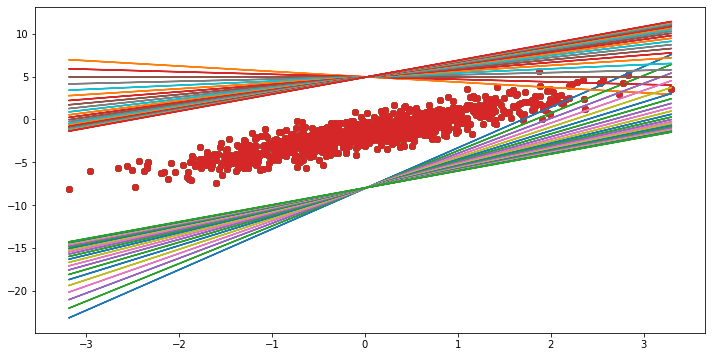

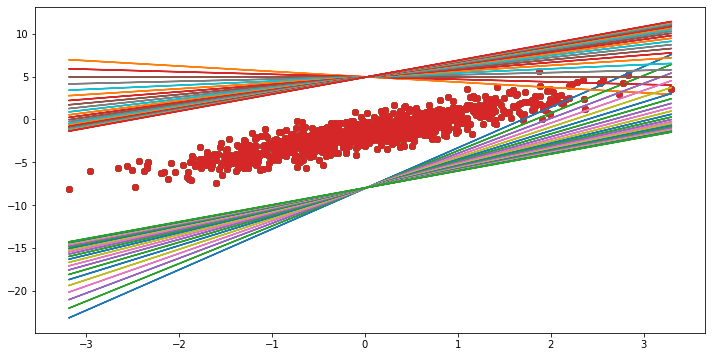

In [54]:
# Implement the algorithm

for iteration in range(MAX_ITER):

    # 1. In each iteration of the loop, calculate the gradient of your loss function with respect to each model parameter.
    gradient = calc_gradient(x, y, SLOPE, INTERCEPT)

    # 2. For each model parameter, multiply the corresponding partial derivative by the learning rate, then negate it.
    update_slope = -LR*gradient[0]
    update_intercept = -LR*gradient[1]

    # 3. Add the resulting product to the previous value of the model parameter to get the updated parameter value.
    # 4. Overwrite the values of each parameter with its updated value.
    SLOPE = SLOPE + update_slope
    INTERCEPT = INTERCEPT + update_intercept

    # 5. Print all variables as you loop to make sure your parameters are converging to their expected values.
    print(f'The slope after iteration {iteration} is {SLOPE}')
    print(f'The intercept after iteration {iteration} is {INTERCEPT}')

    # 6. Visualize the result
    plt.scatter(x, y)
    plt.plot(x, make_line(x, SLOPE, INTERCEPT))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #plt.show()
    time.sleep(0.0001)

    # 7. If the gradient becomes smaller than some pre-determined small threshold value, break out of the loop.
    if abs(gradient[0]) < 0.01 or abs(gradient[1]) < 0.01:
        break